# 1
<b>Suppose the coefficient matrix of a linear system of three equations in three
variables has a pivot position in each column. Explain why the system
has a unique solution.</b>

Pivot cell can be defined as those holding the leading non-zero entry of each row, once we have taken our matrix to echelon form. If all our columns have one of those, then it means these pivots lie at different rows on each colum (otherwise, the rightmost cells repeating position will not be the first ones of their respective rows, contradicting the "leading non-zero" property).

Above means that the columns have all possible positions of the diagonal, for holding those pivots; except perhaps due a different order. If we apply a proper permutation (sequence of row swaps, aka, elementary operations), we can take the echelon form into a lower triangular matrix where all one pivots are within the diagonal. Going further, we can take this matrix into the reduced echelon form; which will be pretty much the identity matrix. 

The identity matrix's columns form a linearly independent set (canonical basis actually), hence by Theorem 10 from the notes, there exists a unique solution to the system $A\vec{x} = b$. The uniqueness is pretty much inherited from the uniqueness of the representation of $\vec{b}$, respecto to the basis formed by the columns of $A$ (that is, $\vec{x}$).






# 2
<b>
The solutions $\left(x,y\right)$ of a single linear equation $ax+by=c$
form a plane in $\mathbb{R}^{2}$ when $a,b$ are not all zero. Program
in Jupyter Notebook a program that plots a set of three linear equations
whose graphs
<ol>
<li>Intersect in a single point</li>
<li>They do no have intersection.</li>
</ol>
</b>

One easy way to specify lines, specially if we want to arrange them in certain way on the plane, is by giving a couple of points. We wrote then a routine that receives a list of lines specifications, each one consisting of a couple of points that define the line. The routine is generic and plots them all, and prints the slope for each line; the optional argument at the end allows to indicate desired portion of axis $X$, where we want to draw the line.

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lines(lines, range_x=[-10,10]):
    i = 0    
    for (p1,p2) in lines:
        x1,y1 = p1
        x2,y2 = p2        
        i += 1
        m = (y2 - y1) / (x2 - x1)
        y = lambda x: m*(x - x1) + y1
        xs = np.arange(range_x[0], range_x[1])
        plt.plot(xs, y(xs))
        print("slope line %d = %.2f" % (i, m))

Then, for the first part (intersect in a single point) we pass a couple lines that intersect orthogonally, and one third that intersects horizontally (they all intersect at point $(\frac{1}{2},\frac{1}{2})$).

slope line 1 = 1.00
slope line 2 = -1.00
slope line 3 = 0.00


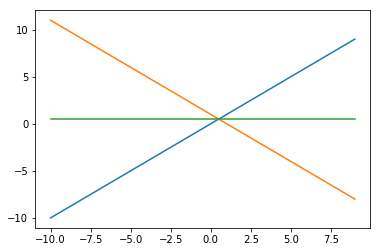

In [41]:
%matplotlib inline

line1 = [(0,0), (1,1)]
line2 = [(0,1), (1,0)]
line3 = [(0,0.5), (1,0.5)]
plot_lines([line1, line2, line3])

While for second  part (no intersection), we pass three parallel lines (assuming Euclidean Geometry, which has as axiom that two parallel lines will never cross).

slope line 1 = 1.00
slope line 2 = 1.00
slope line 3 = 1.00


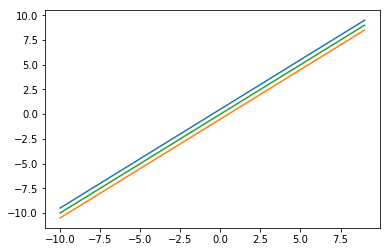

In [42]:
%matplotlib inline

line1 = [(0.0, 0.5), (0.5, 1.0)]
line2 = [(0.5, 0.0), (1.0, 0.5)]
line3 = [(0.5, 0.5), (1.5, 1.5)]
plot_lines([line1, line2, line3])

# 3

<b>Determine $h$ and $k$ such that the solution set of the system (i) is empty, (ii) contains a unique solution, and (iii) contains infinitely many solutions.</b>

Given the low dimension of the problem ($R^2$), we could keep exploiting the geometrical properties of the subspaces (lines). Each subcase being asked can be mapped into a particular geometrical situation, with the two lines representing the equations:

<ul>
    <li>Empty solution set = parallel lines </li>
    <li>Unique solution = non parallel lines</li>
    <li>Infinitely many solutions = same line</li>
</ul>

But given we are dealing with the Gaussian Elimination algorithm, we should try to map these cases into situations found on the extended matrix, while running such procedure (could be at the very beginning, just considering the properties of the matrix itself). Below is the mapping:

<ul>
    <li>Empty solution set = contradiction found, like only zeros a particular row but the extended column being non zero.</li>
    <li>Unique solution = columns of matrix being linearly independent.</li>
    <li>Infinitely many solutions = having free variables, meaning that some of the columns were linearly dependent of the others.</li>
</ul>

While is definitely easier to build the geometric objects that will lead to each scenario, we can try to combine both approaches. For example, we could propose the lines using geometric arguments; but use the matrix and the algorithm for the final conclusion. 

### (a)
\begin{align*}
x_{1}+3x_{2} & =k\\
4x_{1}+hx_{2} & =8
\end{align*}

#### (i) Empty solution set

The geometric argument here would tell us that we need a couple of parallel lines, which in $R^2$ can be characterized by having same slope $m$ according to canonical line equation (we replaced usual variable names $x$ and $y$ by $x_1$ and $y_1$, in order to match our problem names):

<center>$x_2 - a = m(x_1 - b)$</center>

Let us rewrite both equations in above form:

\begin{align*}
x_2 &= -\frac{1}{3}(x_1 - k)\\
x_2 &= -\frac{4}{h}(x_1 - 2)
\end{align*}

We can see that $k$ does not matter much (it just represents the translation in first axis, if we think our line comes from the origin). That we need is that the slopes become equal, that is:

\begin{align*}
\frac{-1}{3} = \frac{-4}{h} \implies \frac{-3}{1} = \frac{-h}{4} \implies h = 12
\end{align*}

Now, let us see what happens on the extended matrix when we have $h = 12$. Let us say that we make zeros below first pivot:

\begin{pmatrix}
    1 & 3 & k \\
    4 & 12 & 8
\end{pmatrix} 

After ${row_2 := row_2 - 4row_1}$

\begin{pmatrix}
    1 & 3 & k \\
    0 & 0 & 8 - 4k
\end{pmatrix}

We can see that the algebraic method runs a bit short here; if we set $k = 2$, the last row would vanish. This would lead us with a single equation, which in turn would mean that we have infinite solutions. But if we want to provoke a contradiction, we need $k \neq 2$. Because that will imply $8 - 4k \neq 0$, which in turn will bring the wanted contradiction (due the last row telling us that a linear combination with coefficients equals all zero, leads to a non zero scalar). 

Therefore, we can lead to an empty solution set by picking any $(k,h)$ in the set $\{(x,12) \backepsilon x \neq 2\}$.

#### (ii) Unique solution

Leveraging our previous geometrical analysis, we can just tell that we want the slopes to be different; the Euclidean Geometry axioms guarantee that they will cross. Actually, we know that the only value of $h$ that makes the slopes equal is $12$; hence, as long as $h \neq 12$, we will have a single solution. Let us pick for simplicity $k = 0$ and $h = 1$, leading to equations:

\begin{align*}
x_2 &= -\frac{x_1}{3}\\
x_2 &= -4(x_1 - 2)
\end{align*}

These two lines pass respectively through the points $\{(0,0),(1,\frac{-1}{3})\}$ and $\{(0,8),(\frac{-1}{2},0)\}$. Let us plot them with our utility function <i>plot_lines</i> from previous exercise, just to confirm that they do intersect:

slope line 1 = -0.33
slope line 2 = 16.00


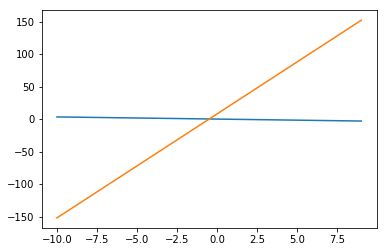

In [43]:
%matplotlib inline

line1 = [(0, 0), (1, -1/3.0)]
line2 = [(0, 8), (-1/2.0, 0)]
plot_lines([line1, line2])

#### Infinitely many solutions

Per our analysis done for the case of Empty solution set, we know that setting $k = 2$ and $h = 12$ will eliminate the second row (all zeroes):

\begin{pmatrix}
    1 & 3 & 2 \\
    4 & 12 & 8
\end{pmatrix} 

After ${row_2 := row_2 - 4row_1}$

\begin{pmatrix}
    1 & 3 & 2 \\
    0 & 0 & 0
\end{pmatrix}

This lead us with single equation $x_1 + 3x_2 = 2$. Any point lying on that line would be a solution to our system.


### (b)

\begin{align*}
-2x_{1}+hx_{2} & =1\\
6x_{1}+kx_{2} & =8
\end{align*}

For this second system, we will leverage the geometric and algebraic arguments developed for the previous one; but trying to be brief to avoid repetition.

#### (i) Empty solution set

Setting both $h$ and $k$ to zero quickly leads to a contradiction in the extended matrix.

\begin{pmatrix}
    -2 & 0 & 1 \\
    6 & 0 & 8
\end{pmatrix} 

Above matrix tells us that $x_1$ needs to comply with two conditions what contradict with each other:

<table>
<tr>
<td>
\begin{align*}
-2x_1 &= 1 \\
6x_1 &= 8
\end{align*}
</td>
<td>
$\implies$
</td>
<td>
\begin{align*}
x_1 &= -\frac{1}{2} \\
x_1 &= \frac{4}{3}
\end{align*}
</td>
</tr>
</table>

#### (ii) Unique solution

Making $h = 6$ and $k = 2$ will make the colums of the associated matrix $A$ linearly independent (they are actually orthogonal):

$A\vec{x} = 
\begin{pmatrix}
-2 & 6 \\
6 & 2 
\end{pmatrix}
\vec{x}
=
\begin{pmatrix}
1 \\
8 
\end{pmatrix}
=
\vec{b}$

By Theorem 10 from the notes, we know that there is a unique solution.

#### Infinitely many solutions

Let us reduce the extended matrix a little bit, to see if we can eliminate entirely one row

\begin{pmatrix}
    -2 & h & 1 \\
    6 & k & 8
\end{pmatrix} 

Make $row_1 := -\frac{1}{2} row_1$

\begin{pmatrix}
    1 & -\frac{h}{2} & -\frac{1}{2} \\
    6 & k & 8
\end{pmatrix} 

Make $row_2 := row_2 - 6 row_1$

\begin{pmatrix}
    1 & -\frac{h}{2} & -\frac{1}{2} \\
    0 & k - 3h & 5
\end{pmatrix} 

We can see that is not possible to make the second row all zeroes; the best we can do is to pick $k = 3h$ to achieve a zero on second column, but the third column will remain as $5$. This means that this system will never have infinitely many solutions (just one or zero).


# 4

<b>
Consider the problem of determining whether the following system of
equations is consistent for all $b_{1},b_{2},b_{3}$:
</b>

\begin{align*}
w_{11}x_{1}+w_{12}x_{2}+w_{13}x_{3} & =b_{1}\\
w_{21}x_{1}+w_{22}x_{2}+w_{23}x_{3} & =b_{2}\\
w_{31}x_{1}+w_{32}x_{2}+w_{33}x_{3} & =b_{3}
\end{align*}

### (a) 
Define appropriate vectors and matrices, and restate the problem in
terms of an augmented matrix. 

In order to define our problem in matricial notation, $A\vec{x} = \vec{b}$, let us define $A$ and $\vec{b}$ as follows:

$A = 
\begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
w_{31} & w_{32} & w_{33}
\end{pmatrix}
\;\;\;,\;\;\;
b = 
\begin{pmatrix}
b_{1} \\
b_{2} \\
b_{3} 
\end{pmatrix}
$

And the extended matrix would simply be $(A \,\vert\, b)$. The problem in terms of such matrix, can be restated as transforming the matrix into its reduced echelon form; if such form does not contain any row where all except last column are zeroes, then the system does have solution(s).

### (b) 
Implement the Gauss-Jordan Algorithm in Jupyter Notebook for the problem.

Rather than attempting to implement an efficient or numerically stable algorithm, we would implement directly the theory seen in class. This theory tells us that the basic row operations, can be achieved by left multiplication by elementary matrices. The assertions made do not take into account round-off errors, thus they can serve only with well behaved examples. For brevity, we only support square matrices.

Our first step will be to define a class that represents BRO (Basic Row Operations):


In [44]:
BRO_MULT = 1
BRO_ADDMULT = 2
BRO_SWAP = 3

class BasicRowOper:
    def __init__(self, bro_type, src, k, dst):
        self.bro_type = bro_type
        self.src = src
        self.k = k
        self.dst = dst
        
    def __str__(self):
        return "(%s, %d, %f, %d)" % (self.bro_type, \
                                     self.src, self.k, self.dst)
        
    # builds the matrix that represents the basic operation
    def _basic_matrix(self, n):
        bmat = np.identity(n)
        if self.bro_type == BRO_MULT:      
            assert self.dst == self.src
            bmat[self.dst] = self.k * bmat[self.src]
        elif self.bro_type == BRO_ADDMULT:
            bmat[self.dst] += self.k * bmat[self.src]
        elif self.bro_type == BRO_SWAP:
            bmat[[self.src, self.dst]] = bmat[[self.dst, self.src]]
        else:
            raise ValueError("Invalid basic row operation type")
        return bmat
    
    def apply(self, mat):
        n, _ = mat.shape
        mat[:,:] = np.dot(self._basic_matrix(n), mat)    
        print("%s: after\n%s\n" % (self, mat))
    
class BroMult(BasicRowOper):
    def __init__(self, k, dst):
        BasicRowOper.__init__(self, BRO_MULT, dst, k, dst)

class BroAddMult(BasicRowOper):
    def __init__(self, src, k, dst):
        BasicRowOper.__init__(self, BRO_ADDMULT, src, k, dst)
        
class BroSwap(BasicRowOper):
    def __init__(self, src, dst):
        BasicRowOper.__init__(self, BRO_SWAP, src, 1, dst)
        

Once we have the basic row operations, let us proceed to implement a helper routine that will make a given cell one (if the current value is zero, it searches for a row below with a non zero in same column and swaps first).

In [45]:
def make_one(mat, i, j):
    if mat[i][j] == 0:
        nzi = np.nonzero(mat[:,j][i:])[0]
        assert nzi.size > 0        
        BroSwap(i, nzi[0]).apply(mat)
    if mat[i][j] == 1:
        return
    BroMult(1.0/mat[i][j], i).apply(mat)
    

Now let us implement another helper routine that will make a given cell zero (assuming certain pivot position, in same column):

In [46]:
def make_zero(mat, i, j, pivot):
    if mat[i][j] == 0:
        return
    assert mat[pivot][j] == 1, \
        "invalid pivot (%d,%d,%d) %f" % (i, j, pivot, mat[pivot][j])
    BroAddMult(pivot, -mat[i][j], i).apply(mat)
    

Putting together the two routines above, we can make the <i>pivot</i> routine, which will know how to make zeroes below or above a given cell.

In [47]:
def pivot(mat, j, below=True):
    n, _ = mat.shape
    if below:
        row_idx = xrange(j+1, n)
    else:
        row_idx = xrange(j-1, -1, -1)
    make_one(mat, j, j)
    for i in row_idx:
        make_zero(mat, i, j, j)
        

And finally, we can implement the Gauss-Jordan algorithm, which will take the extended matrix into (row) reduced echelon form.

In [48]:
def gauss_jordan(A, b):
    n, m = A.shape
    assert n == m
    assert n == b.shape[0]
    mat = np.zeros(shape=(n, n+1))
    mat[:, :n] = A
    mat[:, n] = b
    print("extended matrix\n%s\n" % mat)
    for j in xrange(n):
        pivot(mat, j)
    for j in xrange(n-1, -1, -1):
        pivot(mat, j, False)  
    return mat


Let us test the routines with the sample from the notes, the system:

\begin{align*}
x_{1}  &+ x_{2}  + x_{3} &= 5\\
2x_{1} &+ 3x_{2} + 5x_{3} &= 8\\
4x_{1} &+ 5x_{2}  &= 2
\end{align*}


In [49]:
A = np.array([[1,1,1], [2,3,5], [4,0,5]])
b = np.array([5,8,2])
print("row reduced echelon form =\n%s\n" % gauss_jordan(A,b))

extended matrix
[[ 1.  1.  1.  5.]
 [ 2.  3.  5.  8.]
 [ 4.  0.  5.  2.]]

(2, 0, -2.000000, 1): after
[[ 1.  1.  1.  5.]
 [ 0.  1.  3. -2.]
 [ 4.  0.  5.  2.]]

(2, 0, -4.000000, 2): after
[[  1.   1.   1.   5.]
 [  0.   1.   3.  -2.]
 [  0.  -4.   1. -18.]]

(2, 1, 4.000000, 2): after
[[  1.   1.   1.   5.]
 [  0.   1.   3.  -2.]
 [  0.   0.  13. -26.]]

(1, 2, 0.076923, 2): after
[[ 1.  1.  1.  5.]
 [ 0.  1.  3. -2.]
 [ 0.  0.  1. -2.]]

(2, 2, -3.000000, 1): after
[[ 1.  1.  1.  5.]
 [ 0.  1.  0.  4.]
 [ 0.  0.  1. -2.]]

(2, 2, -1.000000, 0): after
[[ 1.  1.  0.  7.]
 [ 0.  1.  0.  4.]
 [ 0.  0.  1. -2.]]

(2, 1, -1.000000, 0): after
[[ 1.  0.  0.  3.]
 [ 0.  1.  0.  4.]
 [ 0.  0.  1. -2.]]

row reduced echelon form =
[[ 1.  0.  0.  3.]
 [ 0.  1.  0.  4.]
 [ 0.  0.  1. -2.]]



The answer matches what the notes state, so the procedure seems to work (though we did not exercise the swap scenario).

# 5
<b>Explain why a set $\left\{ \boldsymbol{v}_{1},\boldsymbol{v}_{2},\boldsymbol{v}_{3},\boldsymbol{v}_{4}\right\} $
in $\mathbb{R}^{5}$ must be linearly independent when $\left\{ \boldsymbol{v}_{1},\boldsymbol{v}_{2},\boldsymbol{v}_{3}\right\} $
is linearly independent and $\boldsymbol{v}_{4}$ is not in $Span\left\{ \boldsymbol{v}_{1},\boldsymbol{v}_{2},\boldsymbol{v}_{3}\right\} $.</b>

Let us use reduction to the absurd technique, that is, let us suppose that they are not independent and derive contradictions. So, let us suppose that equation below holds:

\begin{equation*}
a\vec{v_1} + b\vec{v_2} + c\vec{v_3} + d\vec{v_4} = 0
\end{equation*}

Since we are assuming that the set $\{\vec{v_1}, \vec{v_2}, \vec{v_3}, \vec{v_4} \}$ is linearly dependent, then it must be that at least one of the scalars in $\{a, b, c, d\}$ is non zero. From here we will derive a contradiction in two cases, and for both we will use the following derived  equation (where $d' = -d$):

\begin{equation*}
d'\vec{v_4} = a\vec{v_1} + b\vec{v_2} + c\vec{v_3} 
\end{equation*}

##### case 1: $d = 0$

If $d = 0 \implies d'=0$, then the equation simplifies to:

\begin{equation*}
\vec{0} = a\vec{v_1} + b\vec{v_2} + c\vec{v_3} 
\end{equation*}

By hypothesis we know that the set $\{\vec{v_1}, \vec{v_2}, \vec{v_3} \}$ is linearly independent, this implies that the only way above equation holds is when $a = b = c = 0$. 

But if $d = 0$, and if the other scalars are also zero; then we are contradicting the derived hypothesis that at least one of them was non zero.

##### case 2: $d \neq 0$

If $d$ is not zero, then $d'$ is alzo non zero; this means we can divide whole equation by $d'$ getting:

\begin{equation*}
\vec{v_4} = \frac{a}{d'}\vec{v_1} + \frac{b}{d'}\vec{v_2} + \frac{c}{d'}\vec{v_3} 
\end{equation*}

Above is telling us that $\vec{v_4}$, being non zero, is a linear combination of $\{\vec{v_1}, \vec{v_2}, \vec{v_3} \}$. By Theorem 11 of the notes, we know that being a linear combination is equivalent to belonging to the spanned subspace; that is, we can tell that $\vec{v_4} \in Span\{\vec{v_1}, \vec{v_2}, \vec{v_3}\}$, but this contradicts one of the hypothesis of the exercise. 

Therefore, after having obtained contradictions in both cases, we can conclude that is not possible that the $\{\vec{v_1}, \vec{v_2}, \vec{v_3}, \vec{v_4} \}$ is linearly dependent; in order words, it must be linearly independent.

# 6
<b>Use the Gauss-Jordan algorithm to solve the inhomogeneous system for
the linear regression presented at the class.</b>

### Generate a convenient set of linear related points in $\mathbb{R}^{2}$.

Let us use one of the data sets from Kaggle, regarding house prizes. We will pay attention only to the prize and the house size. The dataset has many more features, but we focus on these two to fit into $R^2$. The house size is taken to be just the basement size (st. ft); this is simplistic, as it does not consider lot size for example, but should be enough for our purposes.



In [50]:
import pandas as pd

dataset_url = "https://gitlab.com/dario.mx/data-science-learning/raw/2cf3a7204335b4d0fddd4df3432777b79b648cea/machine-learning/course-math-for-ai/hw1/house-prices.csv.gz"
df = pd.read_csv(dataset_url, compression='gzip', usecols=['TotalBsmtSF','SalePrice'])
print(df)

URLError: <urlopen error [Errno 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

Let us visualize the data first, to see if a linear model makes sense:

In [ ]:
%matplotlib inline

data = df.values
plt.scatter(data[:,0], data[:,1])
print

Well, the data is not perfectly linear, but should suffice. You can see certain trend around the center of the cluster, and we expect to estimate such line.

### Use Gauss-Jordan to find variables $a$ and $b$.

On class we saw that the following linear system can be derived from the linear regression problem:


\begin{align*}
A\vec{x} = 
\begin{pmatrix}
\sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i \\
\sum_{i=1}^n x_i & n
\end{pmatrix} 
\begin{pmatrix}
a \\
b
\end{pmatrix}= 
\begin{pmatrix}
\sum_{i=1}^n x_iy_i \\
\sum_{i=1}^n y_i 
\end{pmatrix} = B
\end{align*}

By solving the system, we will know what are the $a$ and $b$ parameters of our linear model $y = ax + b$. Let us proceed first to compute $A$ and $B$:

In [ ]:
n = data.shape[0]
x = data[:,0]
y = data[:,1]
A = np.array([[sum(x*x), sum(x)], [sum(x), n]])
B = np.array([sum(x*y), sum(y)])
print("A =\n%s\n" % A)
print("B =\n%s\n" % B)

And now, let us plug these matrices into our Gauss-Jordan routine:


In [ ]:
print("row reduced echelon form =\n%s\n" % gauss_jordan(A,B))

According to our routine, on the right-most column we have the parameters $a$ and $b$; hence our linear model is:

<center>$y = 111.109604\,x + 63430.6285$ </center>

Let us plot this line along with the data points, to see how well it fits:


In [ ]:
%matplotlib inline

a = 111.109604
b = 63430.6285
plt.scatter(x, y)
plt.plot(x, a*x + b)
print

The fit is not perfect, but at least illustrates the usage of Linear Algebra to solve the Linear Regression problem.